# Sprawozdanie 9 - 25.05.2021 - Kacper Barczyk

In [1]:
import mpmath as mp
from mpmath import sin
from mpmath import cos
from mpmath import sinh
from mpmath import cosh
from mpmath import tan
from mpmath import exp
from mpmath import mpf
from math import pi
from mpmath import sign
import colorsys
import matplotlib
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pylab
from math import ceil
from math import floor
from math import log
from numpy import float64
import random
import time
import scipy
from scipy.linalg import lu
from itertools import product
from mpl_toolkits.mplot3d import Axes3D
from numpy import random
from numpy import allclose
import networkx as nx

# Zad 1 - prosty ranking wierzchołków

In [2]:
def powerMethod(matrix, epsilon, maxIterations):
    (n, _) = matrix.shape
    
    currentV = np.random.rand(n)
    nextV = matrix @ currentV 
    maxValue = np.linalg.norm(nextV, ord=np.inf)
    nextV /= maxValue
    
    i = 0
    while i < maxIterations and np.linalg.norm(currentV - nextV) > epsilon:
        currentV = nextV
        nextV = matrix @ currentV
        maxValue = np.linalg.norm(nextV, ord=np.inf)
        nextV /= maxValue
        i += 1
    
    nextV /= np.linalg.norm(nextV)
    
    return (maxValue, nextV)

In [3]:
matrix = np.array([ [0, 0, 0, 0, 0, 0, 1, 0],
                    [1, 0, 1, 1, 0, 0, 0, 0],
                    [1, 0, 0, 0, 0, 0, 0, 0],
                    [0, 1, 0, 0, 0, 0, 0, 0],
                    [0, 0, 1, 1, 0, 0, 1, 0],
                    [0, 0, 0, 1, 1, 0, 0, 1],
                    [0, 0, 0, 0, 1, 0, 0, 1],
                    [0, 0, 0, 0, 1, 1, 1, 0] ], dtype='float')

# przyjmuje konwencje ze jezeli Aij == 1, to istnieje krawędź (j --> i)

In [4]:
matrix2 = np.array([ [0, 1, 1],
                     [0, 0, 1],
                     [0, 1, 0] ], dtype='float')

# macierz dla testów metody obsługującej kolumny z samymi zerami

In [5]:
def drawMatrix(matrix):
    (n, _) = matrix.shape
    G = nx.DiGraph()
    
    for i in range(n):
        for j in range(n):
            if matrix[j][i] == 1:
                G.add_edge(i, j)
    
    nx.draw(G, with_labels=True)
    plt.show()

In [6]:
def getGraphFromMatrix(matrix):
    (n, _) = matrix.shape
    G = nx.DiGraph()
    
    for i in range(n):
        for j in range(n):
            if matrix[j][i] == 1:
                G.add_edge(i, j)\
    
    return G

In [7]:
def getMatrixFromGraph(G, n):
    edges = nx.edges(G)
    
    matrix = np.zeros(shape=(n, n), dtype=np.float)
    
    for i in range(n):
        tmpArr = filter(lambda x: x[0] == i, edges)
        for tmpEdge in tmpArr:
            matrix[tmpEdge[1], i] = 1
            
    return matrix

In [8]:
def buildAdjMatrix(matrix):
    (n, _) = matrix.shape
    
    copyM = matrix.copy()
    
    # normalizacja wartości w kolumnach - waga linku
    # zliczenie ilości jedynek w kolumnach (== krawedzi wychodzących z wierzchołka równemu indeksowi danej kolumny)
    for i in range(n):
        counter = 0
        
        for j in range(n):
            if copyM[j][i] == 1:
                counter += 1
        impact = 1 / counter
        
        for j in range(n):
            if copyM[j][i] == 1:
                copyM[j][i] = impact
    
    return copyM

# Strony i linkowanie zobrazowane w postaci grafu skierowanego

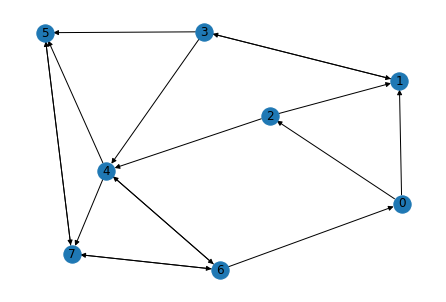

In [9]:
drawMatrix(matrix)

# Obliczenie rankingu wierzchołków przy użyciu powerMethod z lab 8, dla macierzy matrix zdefiniowanej powyżej

In [10]:
epsilon = 10 ** (-4)
maxIterations = 1000

adjMatrix = buildAdjMatrix(matrix)

(eigenvalue, vector) = powerMethod(adjMatrix, epsilon, maxIterations)

print("Wyliczony prosty ranking wierzchołków:")
print(eigenvalue)
print(vector)

Wyliczony prosty ranking wierzchołków:
0.9999507781382432
[0.14004324 0.15755515 0.0700261  0.15755124 0.22757229 0.47267166
 0.42015308 0.68855062]


# Obliczenie prostego rankingu wierzchołków dla losowych grafów

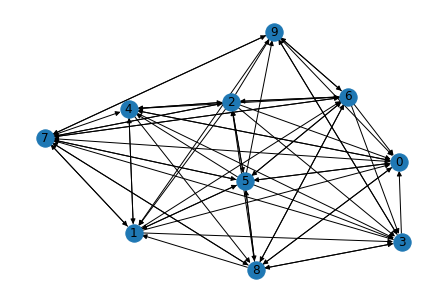

Wyliczony prosty ranking dla 10 wierzchołków
0.9999882017940525
[0.38138973 0.28353843 0.24033316 0.30511228 0.30123404 0.31745536
 0.27054554 0.41648941 0.36046346 0.23490898]
-----------------------------------------------------------


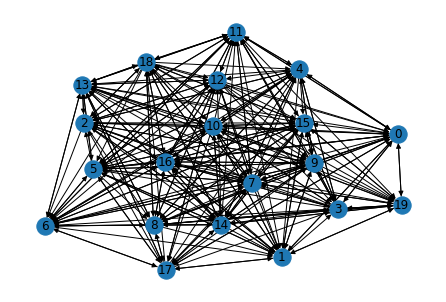

Wyliczony prosty ranking dla 20 wierzchołków
1.000010446955918
[0.24282285 0.25138756 0.1955841  0.20351763 0.1957809  0.25150301
 0.25893898 0.26542558 0.23149869 0.23037955 0.20793629 0.23210602
 0.18027069 0.22754202 0.20238515 0.26555938 0.23705506 0.18601395
 0.17607902 0.1943016 ]
-----------------------------------------------------------


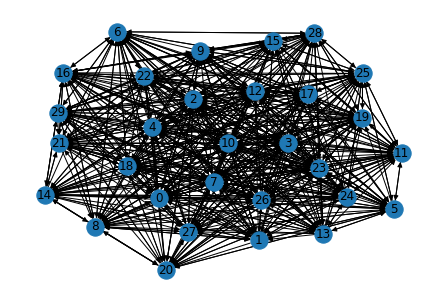

Wyliczony prosty ranking dla 30 wierzchołków
0.9999961793692955
[0.20389684 0.17256697 0.19577664 0.16456927 0.19018022 0.15950612
 0.21200514 0.19878563 0.19791918 0.17089583 0.20766893 0.20249999
 0.16929027 0.1547895  0.18543159 0.1578509  0.20176032 0.1534567
 0.18057629 0.21059091 0.16241699 0.16468933 0.18264652 0.18993585
 0.16303873 0.19197683 0.17450789 0.18025576 0.18249697 0.16998532]
-----------------------------------------------------------


In [11]:
for i in range(1, 4):
    n = 10 * i
    G = nx.gnp_random_graph(n, 0.75, directed=True)
    matrix = getMatrixFromGraph(G, n)
    drawMatrix(matrix)
    adjMatrix = buildAdjMatrix(matrix)
    (eigenvalue, vector) = powerMethod(adjMatrix, epsilon, maxIterations)
    print("Wyliczony prosty ranking dla", n, "wierzchołków")
    print(eigenvalue)
    print(vector)
    print("-----------------------------------------------------------")

# Zad 2 - Page Rank

Modyfikacja funkcji buildAdjMatrix, działa dla stron, które nie linkują żadnej innej strony

In [12]:
def modBuildAdjMatrix(matrix):
    (n, _) = matrix.shape
    
    copyM = matrix.copy()
    
    # zliczenie ilości jedynek w kolumnach (== krawedzi wychodzących z wierzchołka równemu indeksowi danej kolumny)
    for i in range(n):
        counter = 0
        flag = False
        
        for j in range(n):
            if copyM[j][i] == 1:
                counter += 1
                flag = True
                
        # przypadek, gdy w kolumnie była co najmniej jedna jedynka - postępujemy jak w oryginalnej metodzie
        if flag == True:
            impact = 1 / counter
            for j in range(n):
                if copyM[j][i] == 1:
                    copyM[j][i] = impact
        
        # przypadek gdy w kolumnie nie było żadnej jedynki - uzupełniamy wtedy całą kolumnę 1 / n
        else:
            impact = 1 / n
            for j in range(n):
                copyM[j][i] = impact
        
    return copyM

In [13]:
def pageRank(matrix, epsilon, maxIterations, alpha):
    
    (n, _) = matrix.shape
    H = modBuildAdjMatrix(matrix)
    E = np.ones(shape=(n, n), dtype=np.float)
    
    G = alpha * H + (1 - alpha) * ( (1 / n) * E ) 
    
    (eigenvalue, vector) = powerMethod(G, epsilon, maxIterations)
    
    return eigenvalue, vector

# Test pageRank dla macierzy 8x8 zdefiniowanej powyżej

In [14]:
alpha = 0.85

eigenvalue, vector = pageRank(matrix, epsilon, maxIterations, alpha)
print(eigenvalue)
print(vector)

1.0000035734987973
[0.20083315 0.17380857 0.19377077 0.16706417 0.18962069 0.16324321
 0.20752422 0.19630633 0.19606489 0.17283021 0.20385539 0.19986709
 0.17171248 0.15886233 0.18496355 0.16142446 0.1992284  0.1576807
 0.18103395 0.2067413  0.16521706 0.16702505 0.18276799 0.18876386
 0.16603026 0.19097668 0.17601431 0.18110724 0.18240467 0.17202905]


# Testy

Poniższa funkcja służy do zbudowania macierzy reprezentującej graf, na podstawie plików ze strony https://snap.stanford.edu/data/ego-Facebook.html

In [15]:
def buildMatrixFromFile(filename):
    # otwarcie pliku i wpisanie krawędzi do edges
    with open(filename) as f:
        edges = []
        for line in f: # read rest of lines
            edges.append([int(x) for x in line.split()])
    
    # znalezienie wymiaru macierzy (= największy istniejący numer wierzchołka w pliku)
    maxValues = []
    for edge in edges:
        maxValues.append(max(edge))
    
    n = max(maxValues) + 1
    
    matrix = np.zeros(shape=(n, n), dtype=np.float)
    
    for i in range(n):
        tmpArr = filter(lambda x: x[0] == i, edges)
        for tmpEdge in tmpArr:
            matrix[tmpEdge[1], i] = 1
            
    return matrix

Przykładowe grafy znajdują się w poniższych plikach:

In [16]:
filename1 = 'graph.txt'
filename2 = 'facebook_combined.txt'
filename3 = 'Wiki-Vote.txt'

# Ranking wierzchołków dla pliku 'facebook_combined.txt' dla różnych wartości alpha. Funkcja pageRank oprócz rankingu zwraca dodatkową największą wartość własną, która zgodnie z oczekiwaniami, powinna wynosić 1

In [17]:
alphaSet = [0.9, 0.85, 0.75, 0.6, 0.5]
matrix = buildMatrixFromFile(filename2)

for i in range(len(alphaSet)):
    print("ranking dla alpha:", alphaSet[i])
    eigenvalue, vector = pageRank(matrix, epsilon, maxIterations, alphaSet[i])
    print(vector)
    print("----------------------------------------------")


ranking dla alpha: 0.9
[0.00186571 0.00187055 0.00187055 ... 0.00289388 0.00314863 0.02163509]
----------------------------------------------
ranking dla alpha: 0.85
[0.00226445 0.00227    0.00227    ... 0.00342758 0.00368745 0.02325906]
----------------------------------------------
ranking dla alpha: 0.75
[0.00326617 0.00327323 0.00327323 ... 0.00471074 0.00496528 0.02625089]
----------------------------------------------
ranking dla alpha: 0.6
[0.00530984 0.00531903 0.00531903 ... 0.00712829 0.00732712 0.02919167]
----------------------------------------------
ranking dla alpha: 0.5
[0.00698881 0.00699888 0.00699888 ... 0.00894464 0.00907669 0.02949279]
----------------------------------------------


Wnioski:
Niestety moje funkcje nie są zbyt wydajne i choć dla bardzo małych grafów działają szybko, dla dużych grafów z bazy SNAP, obliczanie rankingu zajmuje kilkadziesiąt sekund.